## Classification - MNIST handwriting (Geron ch 3)

## 1. Extract the data

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
#sklearn datasets usually have a similar dictionary structure:
#DESCR key - describes the dataset
#data key - an array with one row per instance and one column per feature (i.e. X)
#target key - an array with the labels (i.e. y)

In [3]:
#Let's try visualising one entry
import matplotlib as mpl
import matplotlib.pyplot as plt

#some_digit = X[:1].to_xarray()
#print(some_digit)
#some_digit_image = some_digit.reshape(28,28)

In [4]:
X, y = mnist['data'], mnist['target']
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       0.0       0.0       0.0  

[1 rows x 784 columns]


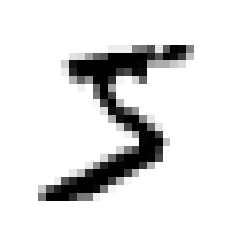

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[[0]]
print(some_digit)
#some_digit = X[:1].values
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

In [6]:
#What's the associated target?  Should be a 5
y[0]

'5'

In [7]:
type(y[0])

str

In [8]:
#Note that the type of y is string right now - change to int
y = y.astype(np.uint8)

In [9]:
#First off create a test and train dataset
#Kinda lazy way of doing this - but the dataset is already shuffled for us, so should be fine
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


## A Binary Classifier - is a digit = 5 or not?

In [10]:
y_train_5 = (y_train == 5) #all items where the target is 5
y_test_5 = (y_test == 5)

#y_train_5 is just a list of Trues and Falses - True where the original value was a 5 (10% of the time, ish), false elsewhere (90% of the time)
print (y_train_5)

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool


In [11]:
#Here we'll use a stochastic gradient descent classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
#Now check teh digit we were looking at earlier - does the model say it's a 5?
#sd = pd.DataFrame(some_digit)
sgd_clf.predict(some_digit)

array([ True])

## Performace Measures

In [13]:
#Cross Validation


from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [14]:
#95+% accuracy!!!
#don't get too excited though.  First off, only 10% of images are 5s
#so if you always guess that an image is NOT a 5, you've already got 10% accuracy
#So accuracy is not geenrally the most preferred accuracy measure for highly skewed datasets


### Using a Confusion Matrix

In [15]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [18]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [19]:
#83% precision, 65% recall

In [20]:
#Often we combine precision and recall in to one metric
#called the F1 score:

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

## Precision-recall tradeoff

In [21]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method ='decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

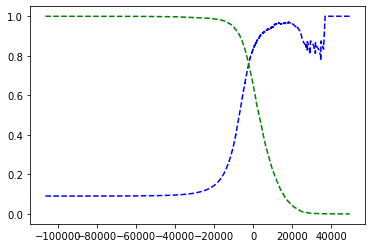

In [22]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label='Recall')


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

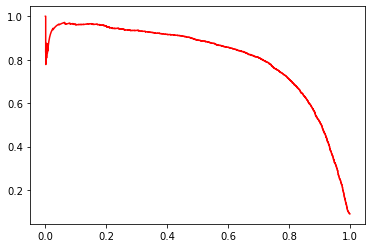

In [23]:
#Or what about Precision directly against recall?


plt.plot(recalls, precisions, 'r-')
plt.xlabel='Recall'
plt.ylabel='Precision'
plt.show()

#no idea why the hell it isn't showing the axis names


## ROC curve (Receiver Operator Characteristic)

In [24]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

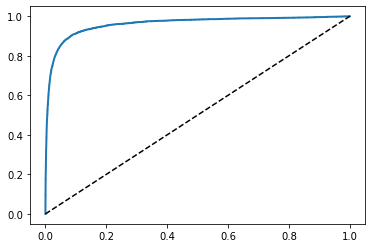

In [25]:
def plot_roc_curve(fpr, tpr, label='None'):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')


plot_roc_curve(fpr, tpr)
plt.show()

In [26]:
#And the Area Under Curve AUC
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [27]:
#Now let's compare two models:  SGD (already trained) and RandomForestClassifier, and look at the relative AUCs & ROCs

#Note that for Random Forests you don't have teh decision function, you have ppredict_proba() instead...

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method = 'predict_proba')

In [28]:
y_scores_forest = y_probas_forest[:, 1] #score = proba of positive class

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)


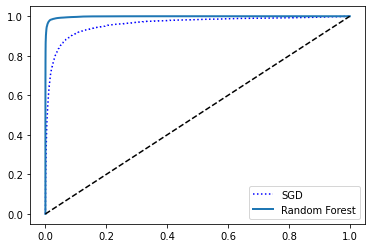

In [29]:
#Now plot both curves on teh same chart

plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc='lower right')
plt.show()

In [30]:

print ('roc auc score for SGD:  ', roc_auc_score(y_train_5, y_scores).round(4))
print("roc auc score for random forest:  ", roc_auc_score(y_train_5, y_scores_forest).round(4))

roc auc score for SGD:   0.9605
roc auc score for random forest:   0.9983


In [31]:
#Random Forest - 99.8% AUC!  that's good

## Multiclass Classification

In [32]:
#Note that it's only some classifiers that work for multiclass natively
# e.g. SGD, RandomForests, Bayes Classifiers can handle it
#
# Logistic Regressors, SVM can NOT - they're strictly binary